In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
pip install pycountry

In [26]:
import pycountry

In [27]:
df= pd.read_csv('/content/drive/MyDrive/.ipynb_checkpoints/road_accident.csv')

In [28]:
df.head()

Index      Country Code  Year  Deaths  Sidedness
0      0  Afghanistan  AFG  1990    4154          0
1      1  Afghanistan  AFG  1991    4472          0
2      2  Afghanistan  AFG  1992    5106          0
3      3  Afghanistan  AFG  1993    5681          0
4      4  Afghanistan  AFG  1994    6001          0

In [29]:
df.shape

(8010, 6)

In [30]:
df.dtypes


Index         int64
Country      object
Code         object
Year          int64
Deaths        int64
Sidedness     int64
dtype: object

In [31]:
df.isna()

Index  Country   Code   Year  Deaths  Sidedness
0     False    False  False  False   False      False
1     False    False  False  False   False      False
2     False    False  False  False   False      False
3     False    False  False  False   False      False
4     False    False  False  False   False      False
...     ...      ...    ...    ...     ...        ...
8005  False    False  False  False   False      False
8006  False    False  False  False   False      False
8007  False    False  False  False   False      False
8008  False    False  False  False   False      False
8009  False    False  False  False   False      False

[8010 rows x 6 columns]

In [32]:
 df.isna().sum()

Index           0
Country         0
Code         1860
Year            0
Deaths          0
Sidedness       0
dtype: int64

In [33]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8005    False
8006    False
8007    False
8008    False
8009    False
Length: 8010, dtype: bool

In [34]:
# Get a list of all unique countries
countries = df['Country'].unique()

print(countries)
print("Total number of unique countries:", len(countries))

['Afghanistan' 'Africa' 'African Region' 'African Union' 'Albania'
 'Algeria' 'America' 'American Samoa' 'Andean Latin America' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australasia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Caribbean' 'Central African Republic' 'Central Asia'
 'Central Europe' 'Central Europe, Eastern Europe, and Central Asia'
 'Central Latin America' 'Central sub-Saharan Africa' 'Chad' 'Chile'
 'China' 'Colombia' 'Commonwealth' 'Commonwealth High Income'
 'Commonwealth Low Income' 'Commonwealth Middle Income' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East As

In [35]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries and make it unique
df_valid_countries = df[df['Country'].isin(valid_countries)].drop_duplicates(subset='Country')

# Convert the 'Country' column to a Python list
valid_countries_list = df_valid_countries['Country'].tolist()

print(valid_countries_list)
print("Total count of valid countries:", len(valid_countries_list))

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan'

In [36]:
# Display the first few rows of the DataFrame
df.head()

Index      Country Code  Year  Deaths  Sidedness
0      0  Afghanistan  AFG  1990    4154          0
1      1  Afghanistan  AFG  1991    4472          0
2      2  Afghanistan  AFG  1992    5106          0
3      3  Afghanistan  AFG  1993    5681          0
4      4  Afghanistan  AFG  1994    6001          0

In [37]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Calculate total deaths for all valid countries
total_deaths_all = df_valid_countries['Deaths'].sum()

print("Total Deaths in All Valid Countries:", total_deaths_all)

Total Deaths in All Valid Countries: 31508077


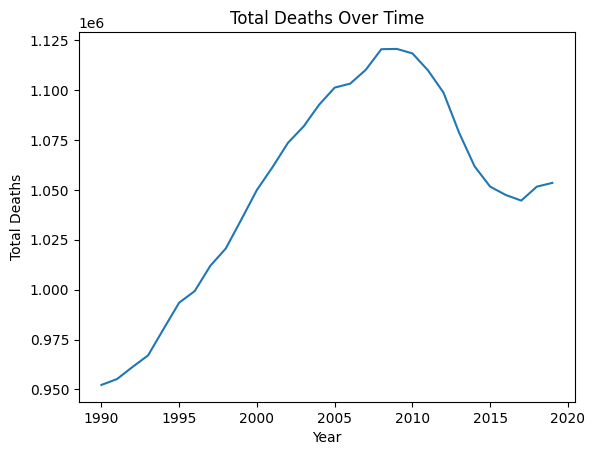

In [38]:

# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Group by Year and sum the Deaths for valid countries
total_deaths_by_year = df_valid_countries.groupby('Year')['Deaths'].sum()

# Plot the line chart
total_deaths_by_year.plot(kind='line', title='Total Deaths Over Time', xlabel='Year', ylabel='Total Deaths')
plt.show()


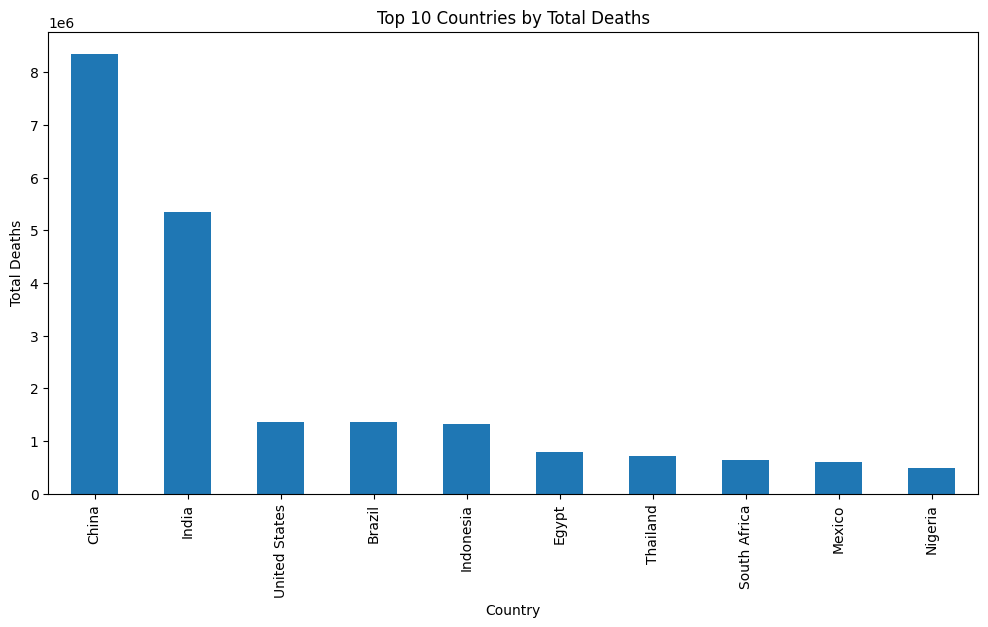

In [39]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Group by Country and sum the Deaths, then select the top 10
top_countries = df_valid_countries.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

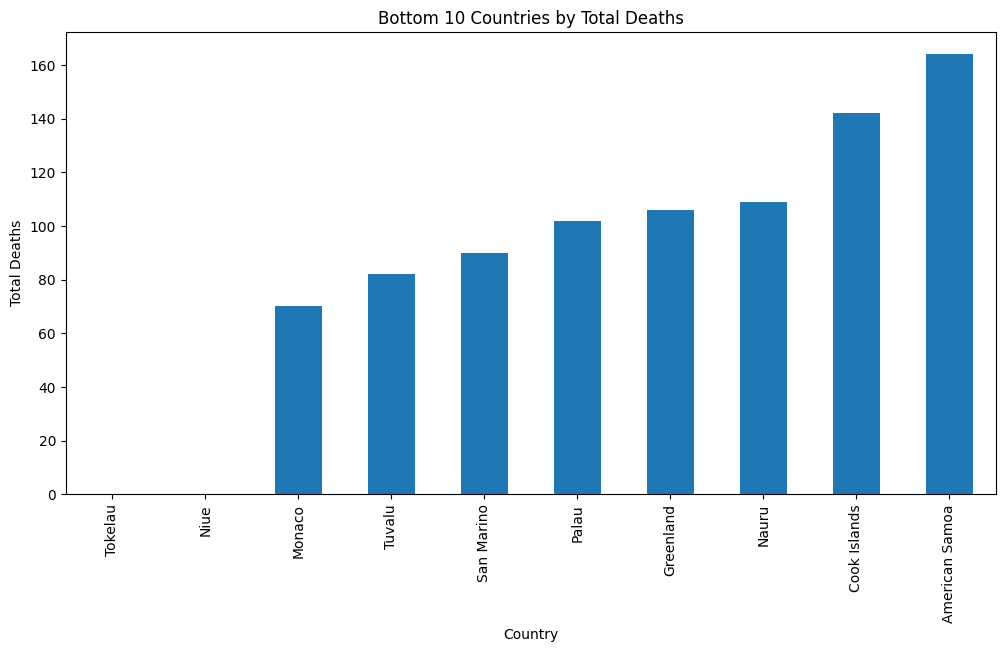

In [40]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Group by Country and sum the Deaths, then select the bottom 10
bottom_countries = df_valid_countries.groupby('Country')['Deaths'].sum().sort_values().head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
bottom_countries.plot(kind='bar')
plt.title('Bottom 10 Countries by Total Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

China: Median=274365.0, Max=329237, Min=226374
India: Median=173134.5, Max=218869, Min=129821
United States: Median=47190.5, Max=49318, Min=39785
Brazil: Median=44409.0, Max=49449, Min=42084
Indonesia: Median=44910.5, Max=50597, Min=36866


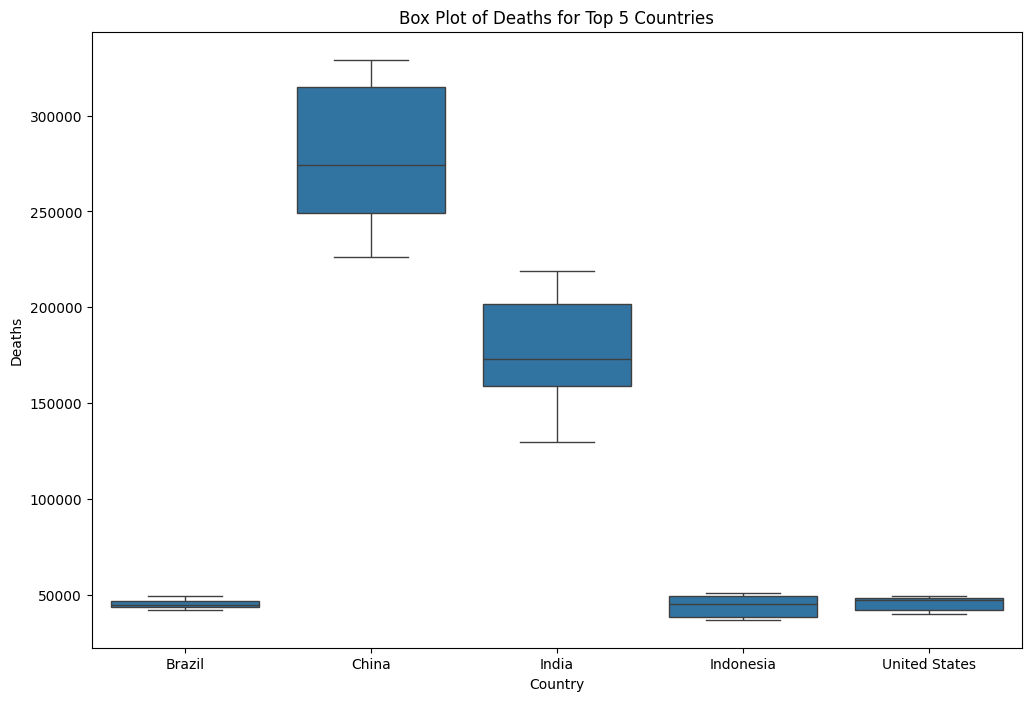

In [41]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Get the top 5 countries based on total deaths
top_countries = df_valid_countries.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 countries
df_top_countries = df_valid_countries[df_valid_countries['Country'].isin(top_countries)]

# Create a box plot for the top 5 countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Deaths', data=df_top_countries)
plt.title('Box Plot of Deaths for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Deaths')

# Print additional statistics
for country in top_countries:
    country_data = df_top_countries[df_top_countries['Country'] == country]['Deaths']
    median_value = country_data.median()
    max_value = country_data.max()
    min_value = country_data.min()
    print(f"{country}: Median={median_value}, Max={max_value}, Min={min_value}")

plt.show()

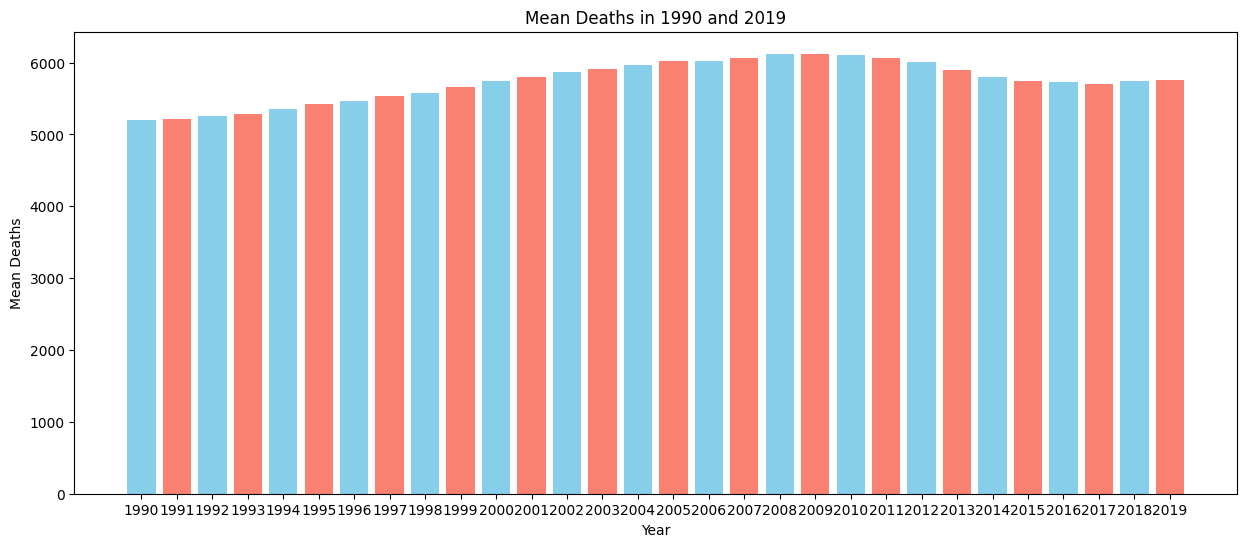

In [42]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Calculate the mean deaths per year
mean_deaths = df_valid_countries.groupby('Year')['Deaths'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(mean_deaths['Year'], mean_deaths['Deaths'], color=['skyblue', 'salmon'])
plt.xlabel('Year')
plt.ylabel('Mean Deaths')
plt.title('Mean Deaths in 1990 and 2019')
plt.xticks(mean_deaths['Year'])
plt.show()

INDIA  & CHINA
is representing in top 20 countries of mean  death as an independent country

         Country    Deaths
0         Africa   6359218
1           Asia  21670793
2      Australia     57136
3         Europe   3503747
4  North America   1452471


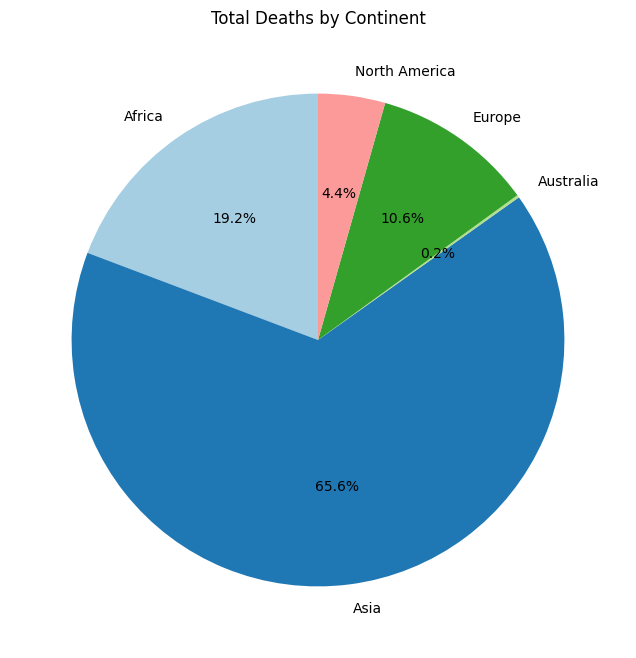

In [43]:
# List of continent names
continents = ['Asia', 'Africa', 'North America', 'South America', 'Europe', 'Australia', 'Antarctica']

# Filter rows where 'Country' column contains continent names
df_continent_only = df[df['Country'].isin(continents)]

# Group by 'Country' (containing continent names) and calculate the total deaths for each continent
total_deaths_by_continent = df_continent_only.groupby('Country')['Deaths'].sum().reset_index()

# Print the total deaths by continent
print(total_deaths_by_continent)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_deaths_by_continent['Deaths'], labels=total_deaths_by_continent['Country'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Deaths by Continent')
plt.show()

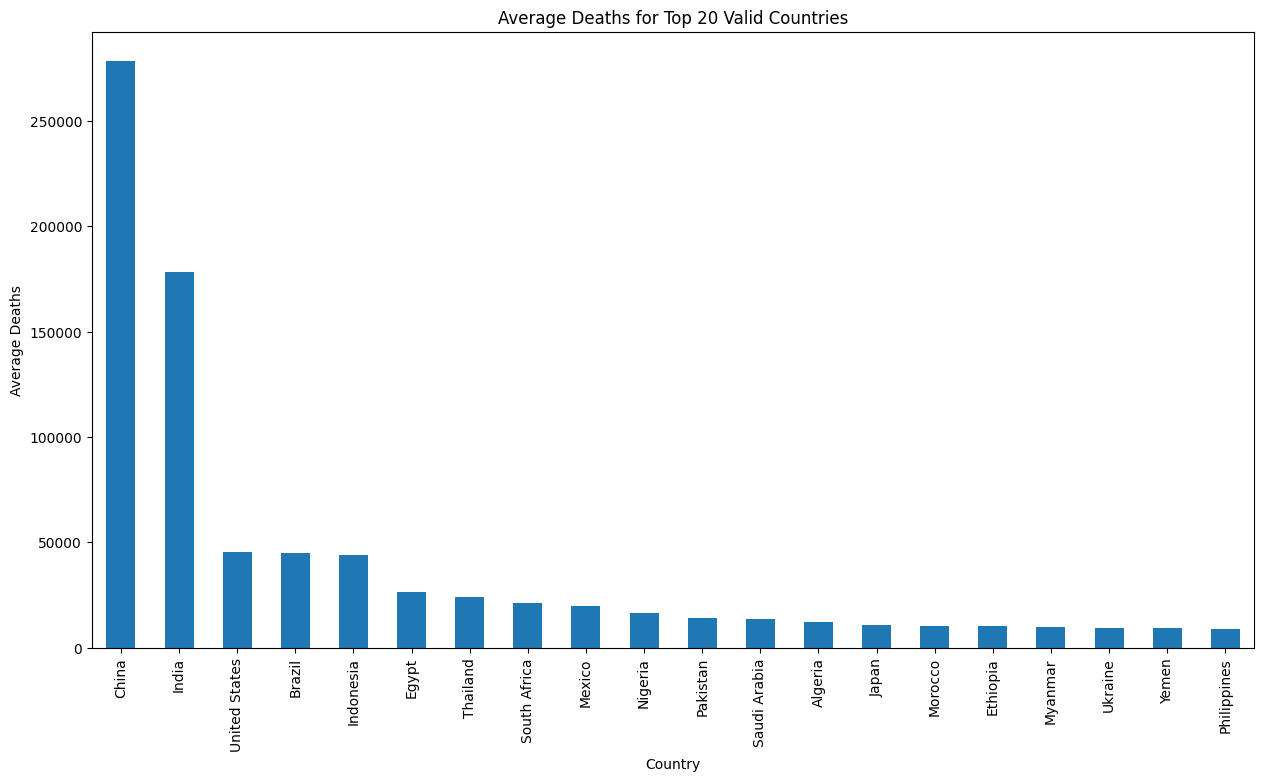

In [44]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Group the data by valid country and calculate average deaths per valid country
average_deaths_by_valid_country = df_valid_countries.groupby('Country')['Deaths'].mean().sort_values(ascending=False)

# Plot the average deaths for the top 20 valid countries
top_valid_countries = average_deaths_by_valid_country.head(20)
plt.figure(figsize=(15, 8))
top_valid_countries.plot(kind='bar')
plt.title('Average Deaths for Top 20 Valid Countries')
plt.xlabel('Country')
plt.ylabel('Average Deaths')
plt.show()

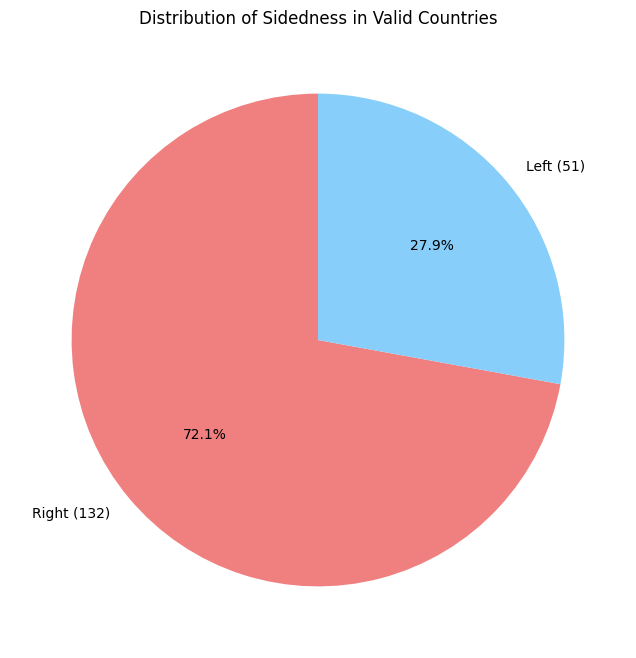

In [45]:
# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Count the number of unique countries for each 'Sidedness' value
unique_countries_count = df_valid_countries.groupby('Sidedness')['Country'].nunique()

# Map Sidedness values to their corresponding labels
sidedness_labels = {
    0: 'Right',1: 'Left'
}

# Create labels for the pie chart
labels = [f'{sidedness_labels[i]} ({unique_countries_count[i]})' for i in unique_countries_count.index]

# Plot a pie chart for the distribution of 'Sidedness' in valid countries
plt.figure(figsize=(8, 8))
plt.pie(unique_countries_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Sidedness in Valid Countries')
plt.show()


Total Deaths for Left-Side Drivers: 18491902
Total Deaths for Right-Side Drivers: 13016175


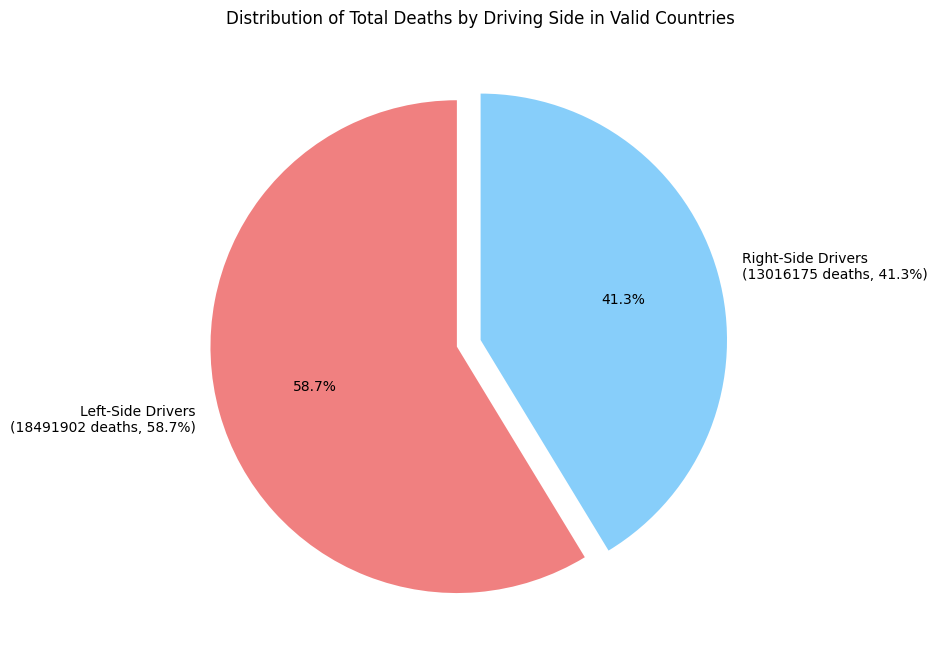

In [46]:

# Get a list of valid country names from pycountry
valid_countries = set(country.name for country in pycountry.countries)

# Filter DataFrame to include only valid countries
df_valid_countries = df[df['Country'].isin(valid_countries)]

# Calculate total deaths for left-side drivers (Sidedness = 1) and right-side drivers (Sidedness = 0)
total_deaths_left = df_valid_countries[df_valid_countries['Sidedness'] == 1]['Deaths'].sum()
total_deaths_right = df_valid_countries[df_valid_countries['Sidedness'] == 0]['Deaths'].sum()

# Create a pie chart with labels showing both percentage and total deaths
labels = [f'Left-Side Drivers\n({total_deaths_left} deaths, {total_deaths_left / (total_deaths_left + total_deaths_right) * 100:.1f}%)',
          f'Right-Side Drivers\n({total_deaths_right} deaths, {total_deaths_right / (total_deaths_left + total_deaths_right) * 100:.1f}%)']
sizes = [total_deaths_left, total_deaths_right]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (Left-Side Drivers)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Print the values
print(f"Total Deaths for Left-Side Drivers: {total_deaths_left}")
print(f"Total Deaths for Right-Side Drivers: {total_deaths_right}")

plt.title('Distribution of Total Deaths by Driving Side in Valid Countries')
plt.show()